## *Evaluation exercises*

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

import wrangle as wr
import explore as ex

1. **Load your ```zillow``` dataset.**

In [15]:
df = wr.get_zillow()

In [16]:
train, validate, test = wr.split_zillow(df)

In [17]:
def full_split(train, validate, test, target):
    '''
    accepts a data frame and the name of the target variable as a parameter
    splits the data frame into:
    X_train, X_validate, X_test, y_train, y_validate, y_test
    '''
    #train, validate, test = train_validate_test_split(df, target)

    #save target column
    y_train = train[target]
    y_validate = validate[target]
    y_test = test[target]

    #remove target column from the sets
    train.drop(columns = target, inplace=True)
    validate.drop(columns = target, inplace=True)
    test.drop(columns = target, inplace=True)

    return train, validate, test, y_train, y_validate, y_test

In [18]:
X_train, X_validate, X_test, y_train, y_validate, y_test = full_split(train, validate, test, 'home_value')

2. **Fit a linear regression model (ordinary least squares) and compute ```yhat```, predictions of ```taxvaluedollarcnt``` using only ```calculatedfinishedsqft```.**

Here is some sample code to get you started:
```python
from sklearn.linear_model import LinearRegression

# assuming X and y are already defined
model = LinearRegression().fit(X, y)
predictions = model.predict(X)
```
Modify and add to the code above as necessary for it to work with the zillow dataset.

In [28]:
sample = X_train.sample(100_000)
y_sample = y_train.sample(100_000)

In [33]:
model = LinearRegression().fit(X_train[['sq_feet']], y_train)

In [34]:
predictions = model.predict(X_train[['sq_feet']])

In [103]:
residuals = y_train - predictions

3. **Plot the residuals for the linear regression model that you made.**

In [60]:
baseline = y_train.mean()

In [112]:
evaluation = pd.DataFrame()

In [113]:
evaluation = pd.DataFrame(X_train.loc[:, 'sq_feet'])
evaluation['actual'] = y_train
evaluation['baseline'] = baseline
evaluation['predictions'] = predictions
evaluation['residuals'] = residuals

In [114]:
evaluation['bl_residuals'] = y_train - baseline

<AxesSubplot:xlabel='sq_feet', ylabel='home_value'>

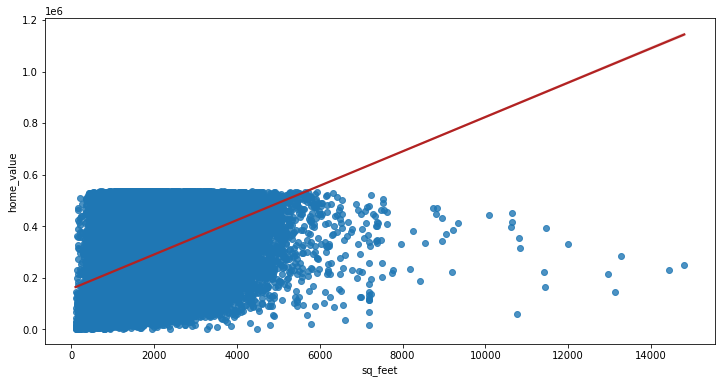

In [58]:
plt.figure(figsize = (12, 6))
sns.regplot(x=X_train.sq_feet, y=y_train, fit_reg=True, line_kws={'color':'firebrick'})

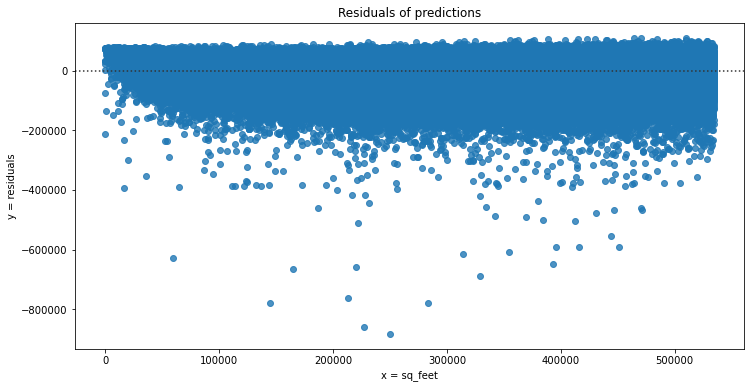

In [95]:
plt.figure(figsize = (12, 6))
sns.residplot(x=y_train, y=residuals, line_kws={'color':'firebrick'})
plt.xlabel('x = sq_feet')
plt.ylabel('y = residuals')
plt.title('Residuals of predictions');

In [101]:
evaluation.columns

Index(['sq_feet', 'baseline', 'predictions', 'residuals', 'actual',
       'bl_residuals'],
      dtype='object')

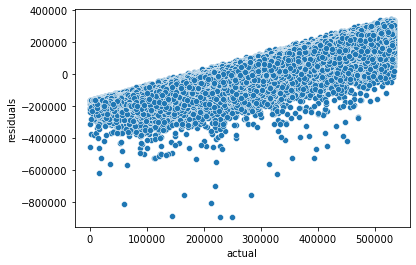

In [108]:
sns.scatterplot(data=evaluation, x='actual', y='residuals')

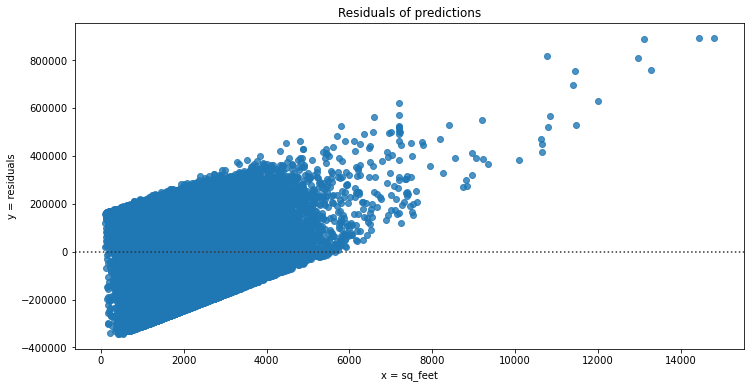

In [53]:
plt.figure(figsize = (12, 6))
sns.residplot(x=X_train.sq_feet, y=residuals, line_kws={'color':'firebrick'})
plt.xlabel('x = sq_feet')
plt.ylabel('y = residuals')
plt.title('Residuals of predictions');

In [100]:
y_train

1648005    441974.0
388938     222754.0
127307     309005.0
2030696     85579.0
1011301    364445.0
             ...   
2071750    234189.0
441974     497472.0
1389290    308711.0
642141     207600.0
1157109    194129.0
Name: home_value, Length: 898629, dtype: float64

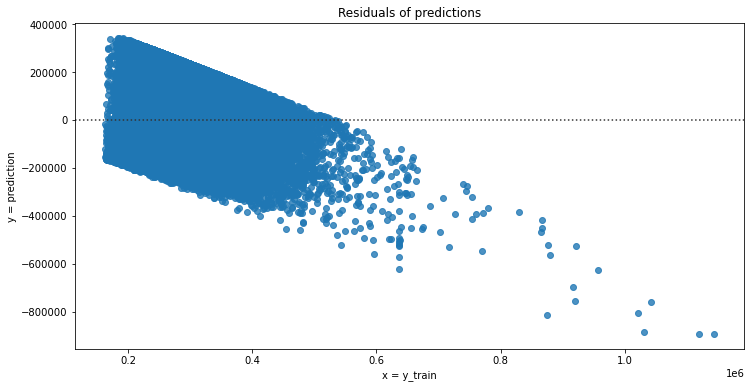

In [98]:
plt.figure(figsize = (12, 6))
sns.residplot(y=y_train, x=predictions)
plt.xlabel('x = y_train')
plt.ylabel('y = prediction')
plt.title('Residuals of predictions');

4. **Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.**

In [115]:
# sum of squared errors
SSE = (evaluation.residuals ** 2).sum()
print('SSE =', "{:.1f}".format(SSE))

# total sum of squares
TSS = (evaluation.bl_residuals ** 2).sum()
print('TSS =', "{:.1f}".format(TSS))

# explained sum of squares
ESS = TSS - SSE
print('ESS =', "{:.1f}".format(ESS))

# mean squared error
MSE = SSE/len(y_train)
print('MSE =', "{:.1f}".format(MSE))

# root mean squared error
RMSE = MSE ** .5
print('RMSE =', "{:.1f}".format(RMSE))

SSE = 15344296300571412.0
TSS = 16661477091276478.0
ESS = 1317180790705066.0
MSE = 17075229377.8
RMSE = 130672.2


In [150]:
mean_squared_error(y_train, predictions)

17075229377.831577

5. **Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average ```taxvaluedollarcnt``` amount).**

In [90]:
SSE_baseline = TSS
print('SSE for baseline =', "{:.1f}".format(SSE_baseline))

MSE_baseline = SSE_baseline / len(y_train)
print('MSE for baseline =', "{:.1f}".format(MSE_baseline))

RMSE_baseline = MSE_baseline ** .5
print('RMSE for baseline =', "{:.1f}".format(RMSE_baseline))

SSE for baseline = 16661477091276478.0
MSE for baseline = 18540996441.6
RMSE for baseline = 136165.3


6. **Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.**

In [116]:
difference = SSE - SSE_baseline
if difference > 0:
    print('Baseline is better')
else:
    print('Model is better')

Model is better


7. **What is the amount of variance explained in your model?**

In [148]:
r2 = ESS / TSS
print(f'R2 score = {r2}')

R2 score = 0.07905546329951191


In [149]:
r2_score(y_train, predictions)

0.07905546329951185

8. **Is your model better than the baseline model?**

The model predicts better than the baseline

9. **Create a file named ```evaluate.py``` that contains the following functions.**

* ```plot_residuals(y, yhat)```: creates a residual plot
* ```regression_errors(y, yhat)```: returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
* ```baseline_mean_errors(y)```: computes the SSE, MSE, and RMSE for the baseline model
* ```better_than_baseline(y, yhat)```: returns true if your model performs better than the baseline, otherwise false

In [109]:
def plot_residuals(y, yhat):
    plt.figure(figsize = (12, 6))
    res = yhat - y
    sns.scatterplot(x=y, y=res)
    plt.xlabel('x = actual values')
    plt.ylabel('y = residuals')
    plt.title('Residuals of predictions')
    plt_show()

In [133]:
((evaluation.actual - evaluation.actual.mean()) ** 2).sum()

1.6661477091276478e+16

In [152]:
def regression_errors(y, yhat):
    
    res = yhat - y
    bl_res = y - y.mean()
    # sum of squared errors
    SSE = (res ** 2).sum()
    
    # total sum of squares
    TSS = (bl_res ** 2).sum()
    

    # explained sum of squares
    ESS = TSS - SSE
    

    # mean squared error
    MSE = SSE/len(y)
    

    # root mean squared error
    RMSE = MSE ** .5
    
    return SSE, TSS, ESS, MSE, RMSE

In [134]:
def baseline_mean_errors(y):
    bl_res = y - y.mean()
    SSE_baseline = (bl_res ** 2).sum()
    MSE_baseline = SSE_baseline / len(y)
    RMSE_baseline = MSE_baseline ** .5
    
    return SSE_baseline, MSE_baseline, RMSE_baseline

In [127]:
def better_than_baseline(y, yhat):
    
    SSE, _, _, _, _ = regression_errors(y, yhat)
    SSE_baseline, _, _ = baseline_mean_errors(y)
    
    difference = SSE - SSE_baseline
    if difference > 0:
        print('Baseline is better')
    else:
        print('Model is better')

In [153]:
SSE, TSS, ESS, MSE, RMSE = regression_errors(evaluation.actual, evaluation.predictions)
(SSE, TSS, ESS, MSE, RMSE)

(1.5344296300571412e+16,
 1.6661477091276478e+16,
 1317180790705066.0,
 17075229377.831577,
 130672.22114065244)

In [135]:
baseline_mean_errors(y_train)

(1.6661477091276478e+16, 18540996441.553165, 136165.32760417816)

In [145]:
better_than_baseline(y_train, predictions)

Model is better


In [154]:
x = sm.add_constant(X_train.sq_feet)
results = sm.OLS(y_train, x).fit()

In [155]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             home_value   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                 7.714e+04
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:24:05   Log-Likelihood:            -1.1861e+07
No. Observations:              898629   AIC:                         2.372e+07
Df Residuals:                  898627   BIC:                         2.372e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.562e+05    404.361    386.322      0.000    1.55e+05    1.57e+05
sq_feet       66.7197      0.240    277.740      0.000      66.249      67.191
==============================================================================
Omnibus:                   145008.766   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34557.225
Skew:                           0.123   Prob(JB):                         0.00
Kurtosis:                       2.071   Cond. No.                     4.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

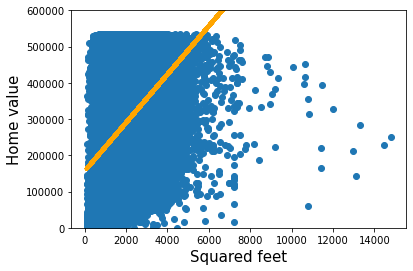

In [160]:
#visualiaze
plt.scatter(X_train.sq_feet, y_train)
#numbers for yhat line are from the results.summary(), coef: const and petal_length
yhat = 66.7197*X_train.sq_feet + 1.562e+05
fig = plt.plot(X_train.sq_feet, yhat, lw=4, c='orange', label='regression line')
plt.xlabel('Squared feet', fontsize = 15)
plt.ylabel('Home value', fontsize = 15)
plt.ylim(0, 600_000)
plt.show()